This is the code for the Example 19. in the main text.
The following image is the SCM that we implement.

- Unobserved nodes: $X_1, X_3, X_4, X_5, X_7, X_8$
- Cause node: $X_9$
- Outcome node: $X_{11}$
- Node that satisfies the backdoor criterion for a pair $(X_9, X_{11})$: $X_2, X_6, X_{10}$

<div>
<img src="../SCM_fig/SCM5.png" width="600"/>
</div>

- the structural equation: $X_i = f(PA(X_i)) + U_i$
  - $X_1 = U_1$
  - $X_2 = X_1 (U_2 + 0.1)$
  - $X_3 = -\frac{\sqrt{|X_2|} (|U_3| + 0.1)}{2} + |X_2| + \frac{U_3}{5}$
  - $X_4 = X_2 + \frac{U_4 + 0.1}{2} X_2$
  - $X_5 = -\frac{1}{1 + (|U_5| + 0.1) \exp(-X_1)}$
  - $X_6 = \frac{U_6 (|X_5| + 0.3)}{5} + U_6$
  - $X_7 = X_6 * U_7 + |X_6 + 0.01| |U_7|$
  - $X_8 = 3 X_6 + 0.1 + U_8$
  - $X_9 = X_5^3 X_8 + X_5 + X_8 + U_9$
  - $X_{10} =X_9 U_{10} + (U_{10} + 0.1)^2$
  - $X_{11} = X_3 (X_8 - 0.1) + X_9 X_{10} + X_3 X_9 - X_7 X_{10} + X_3 X_8 - X_4 X_9 + X_9 X_{10}$

In [4]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM5 import SCM5

  0%|          | 0/5 [00:00<?, ?it/s]

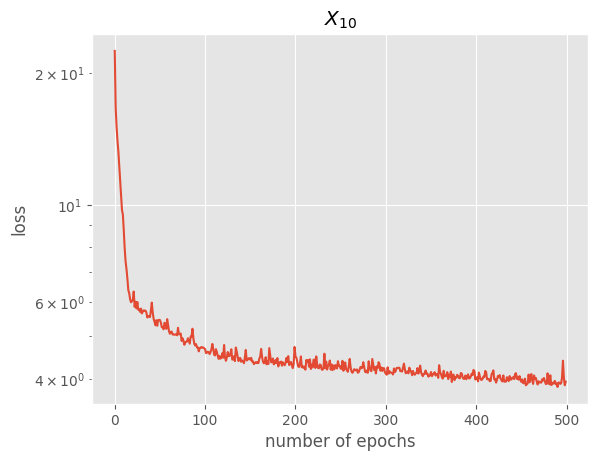

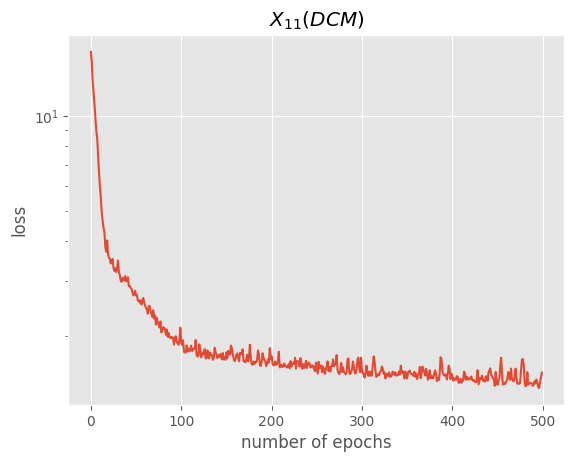

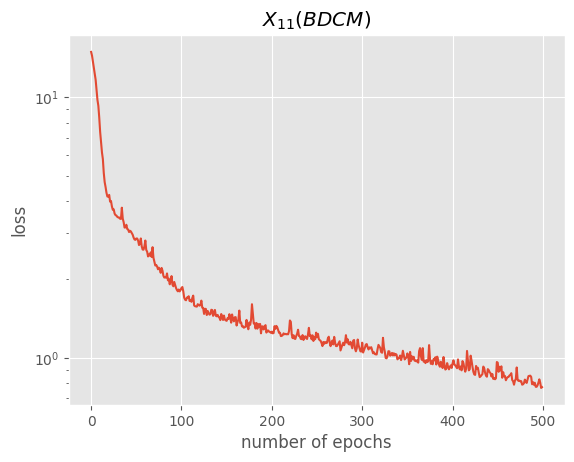

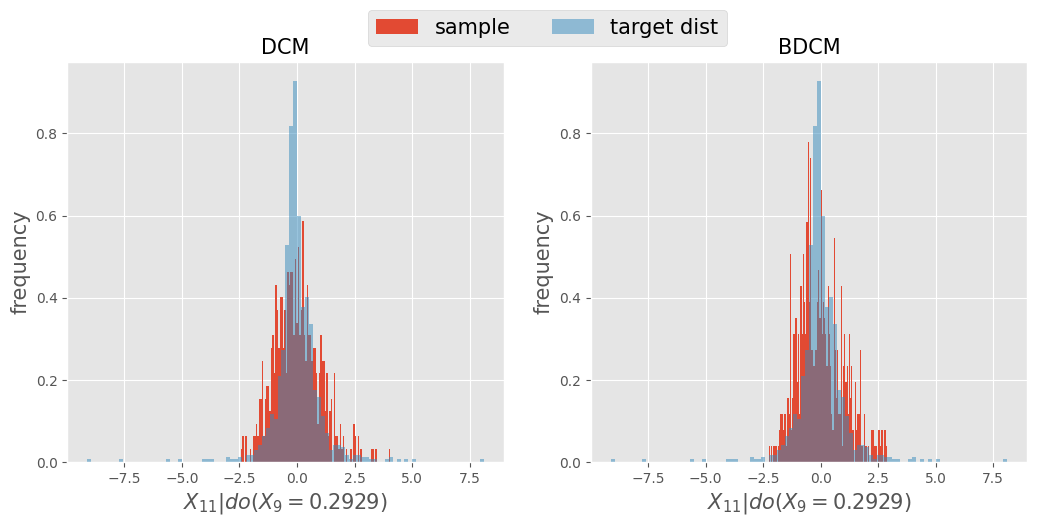

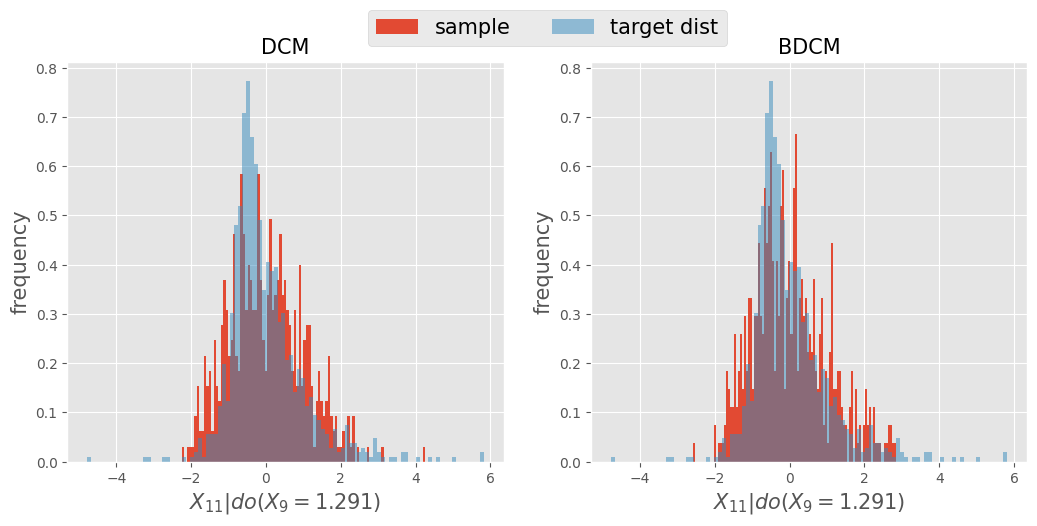

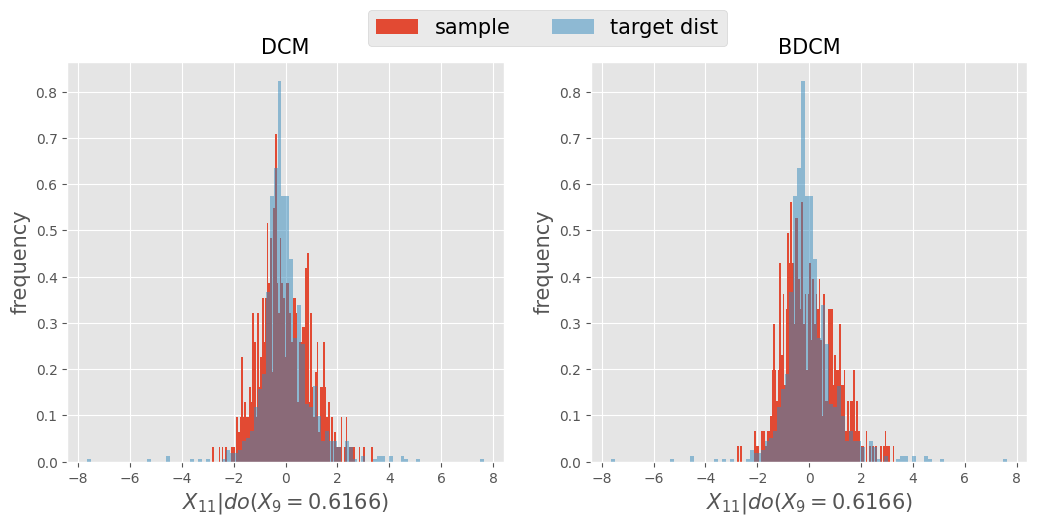

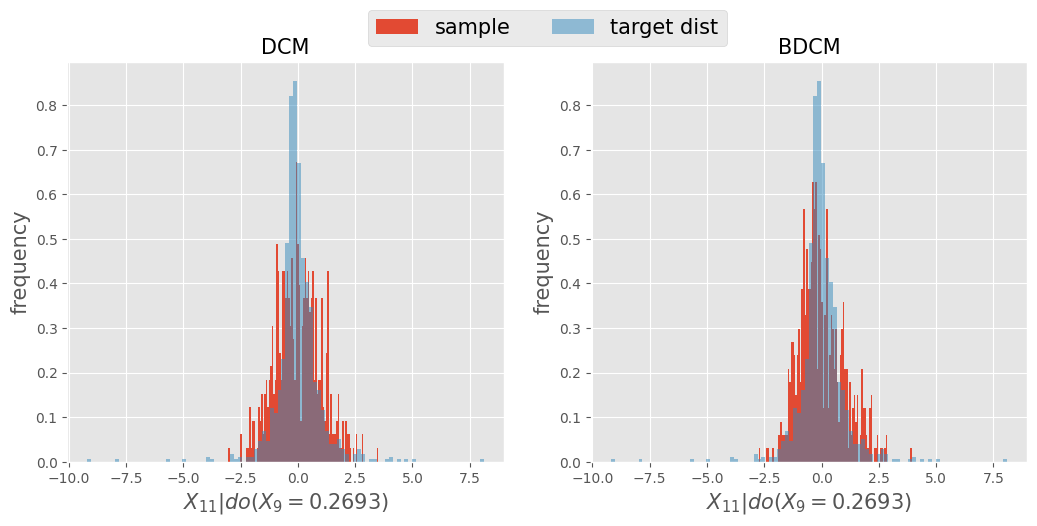

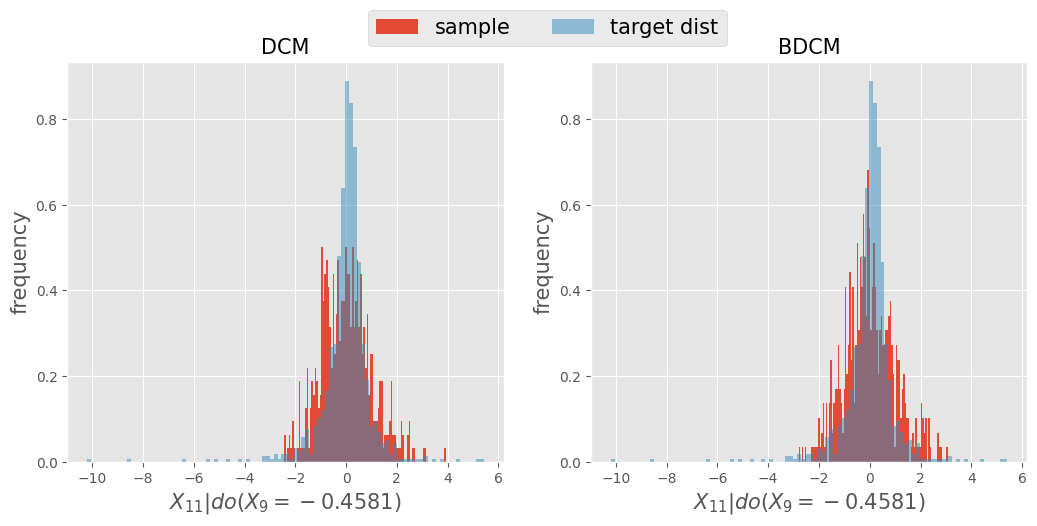

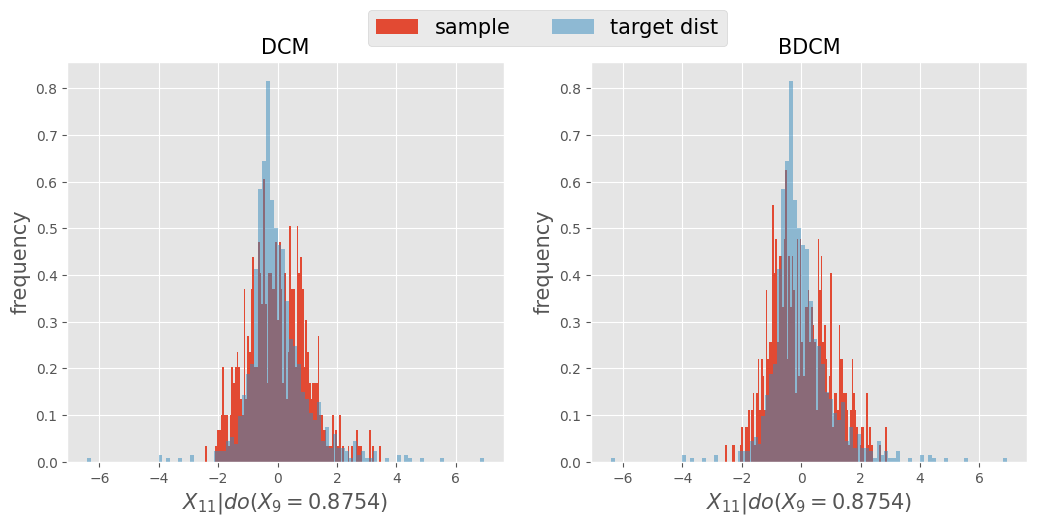

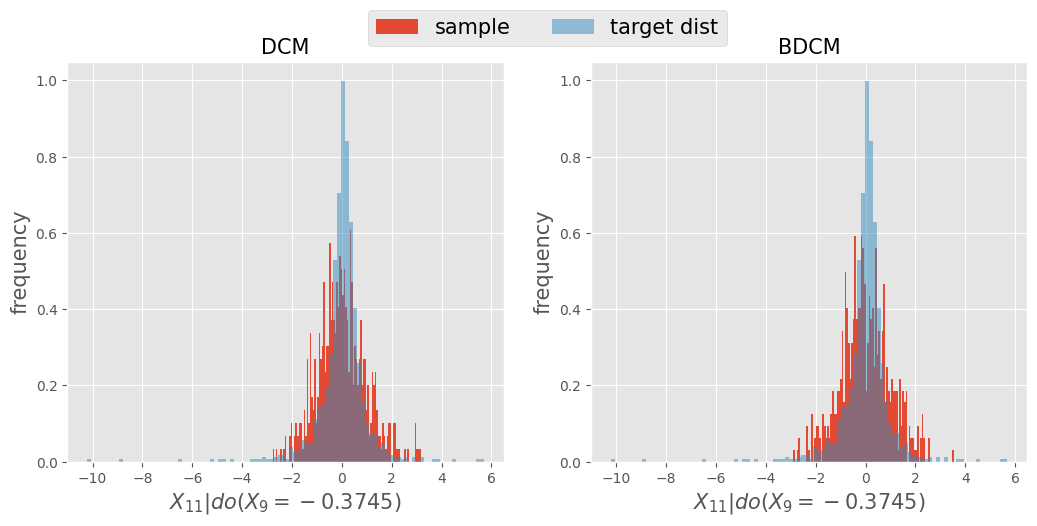

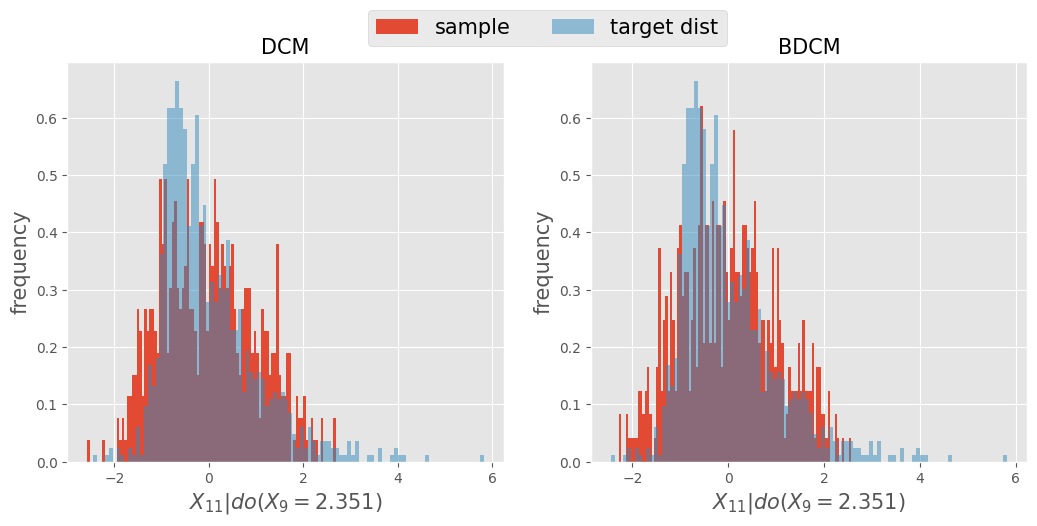

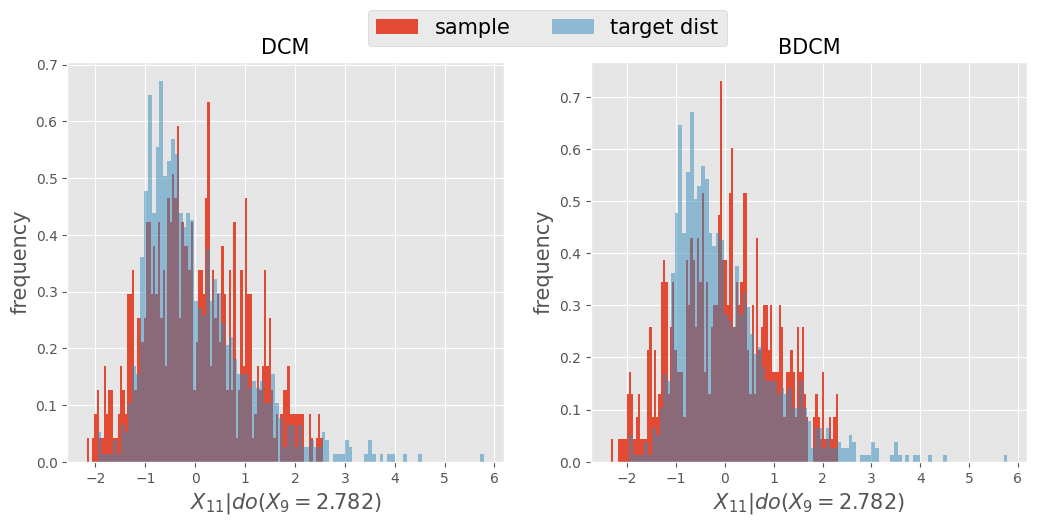

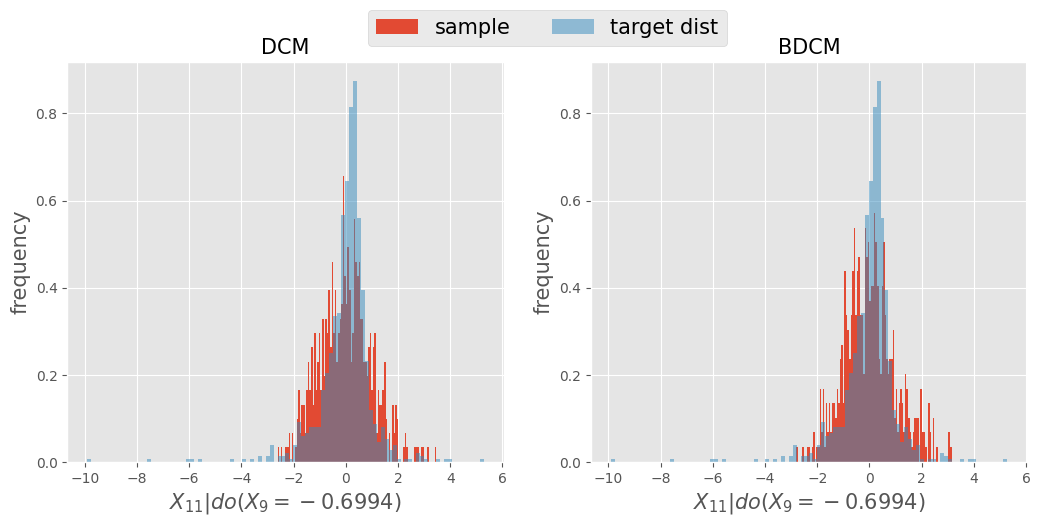

 20%|██        | 1/5 [08:28<33:54, 508.61s/it]

mean of MMD for DCM: 0.00108
standard deviation of MMD for DCM: 0.000456
mean of MMD for BDCM: 0.00113
standard deviation of MMD for BDCM: 0.00044


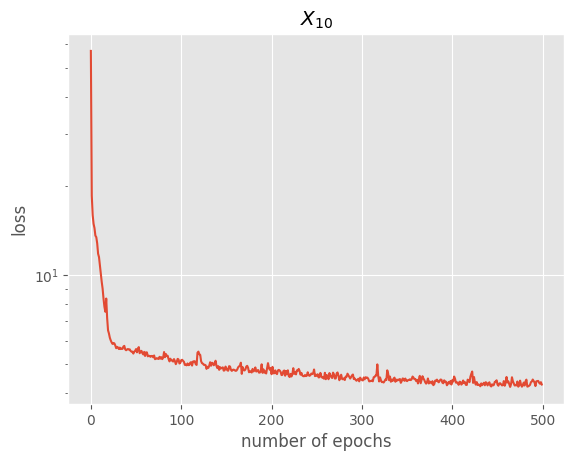

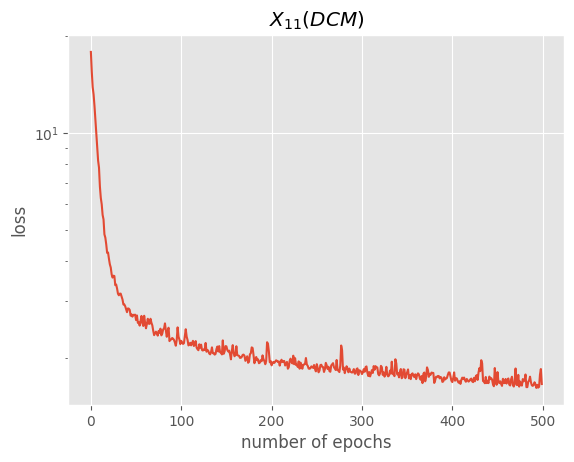

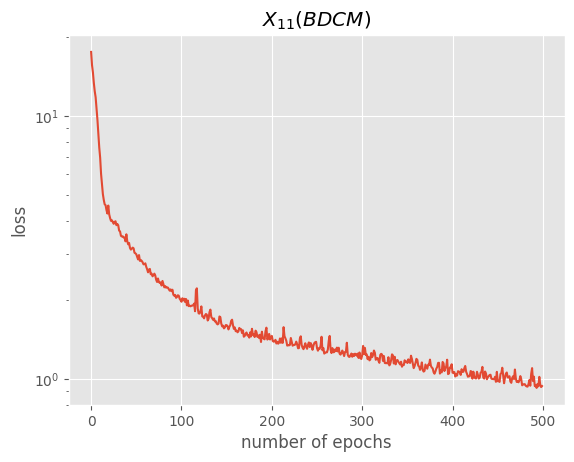

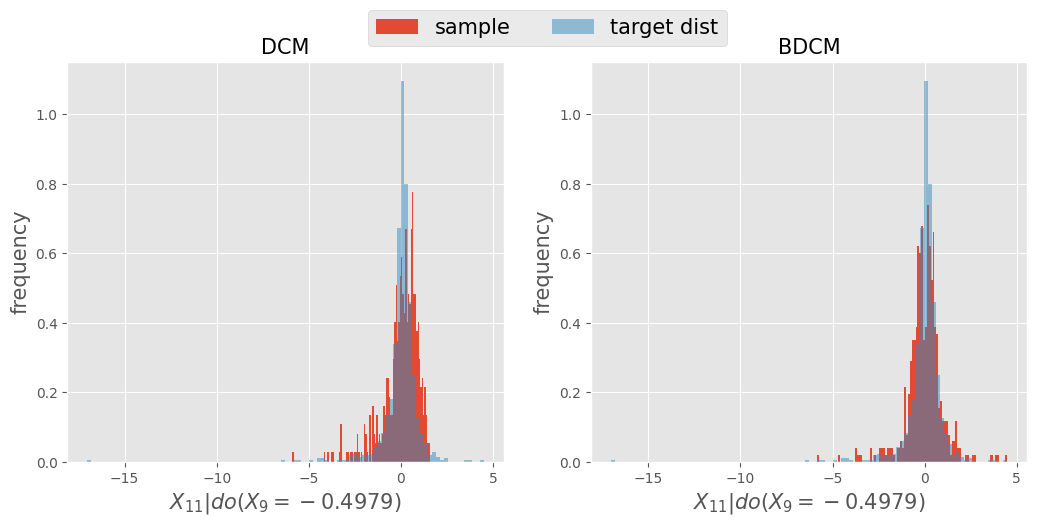

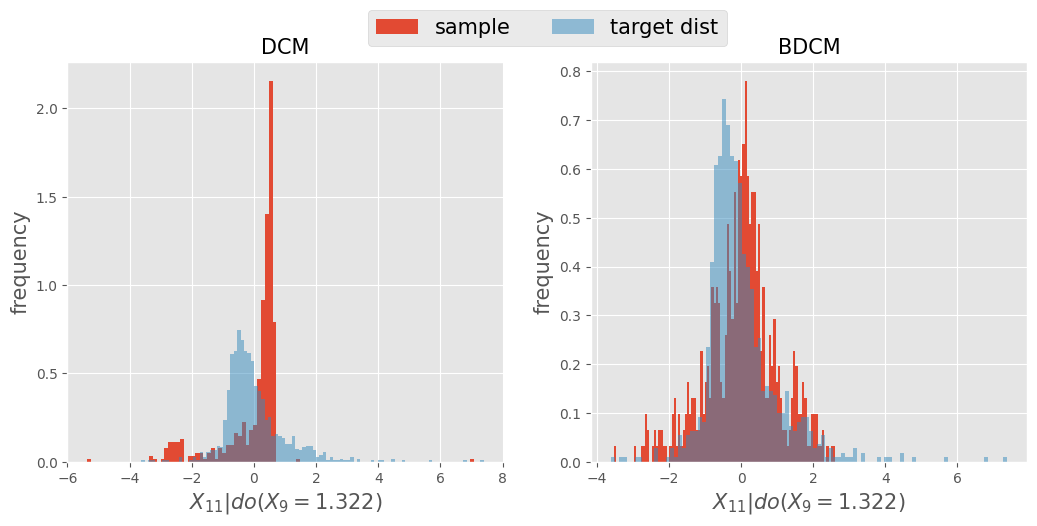

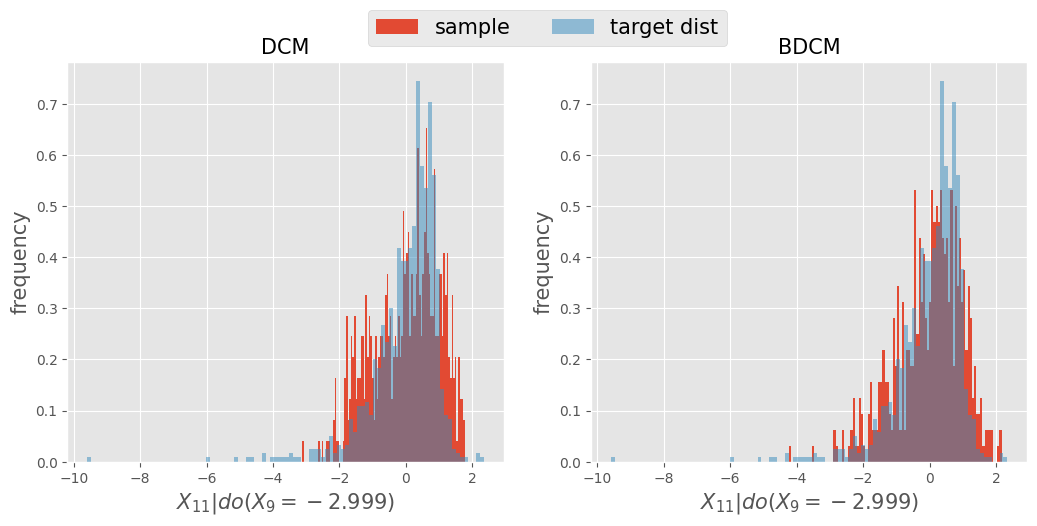

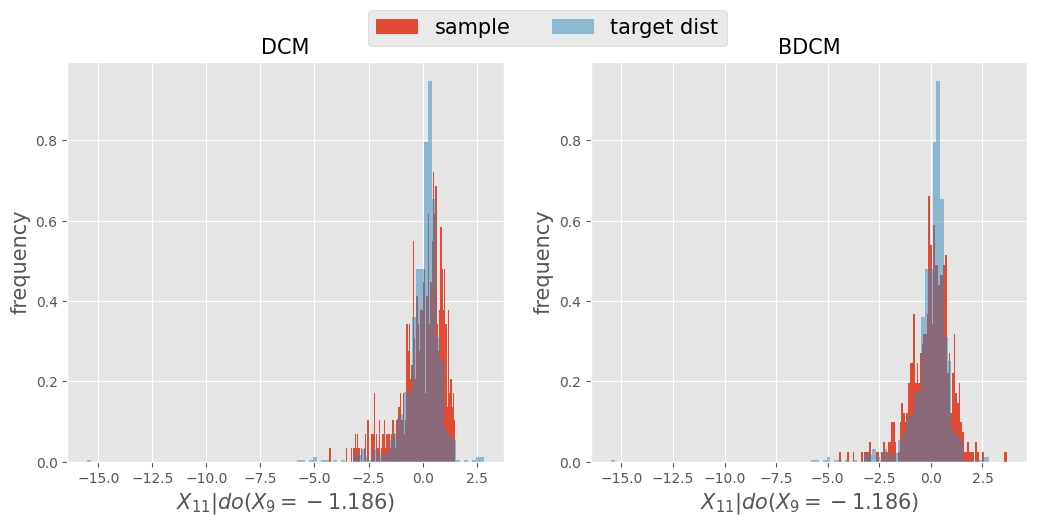

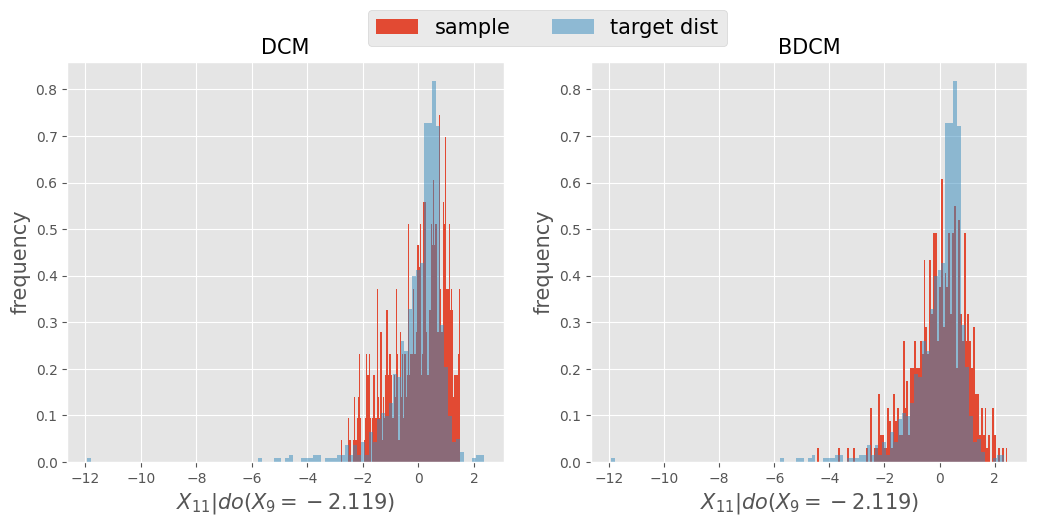

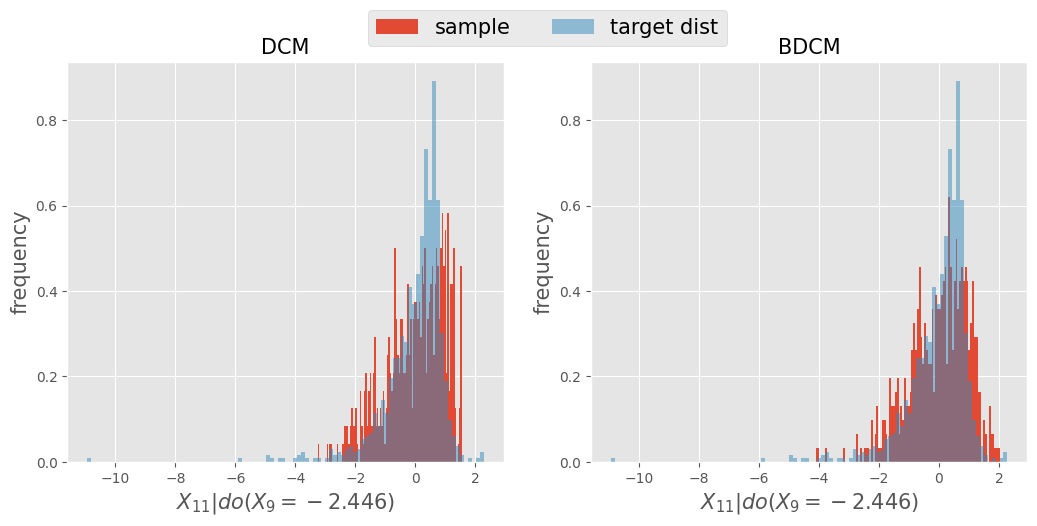

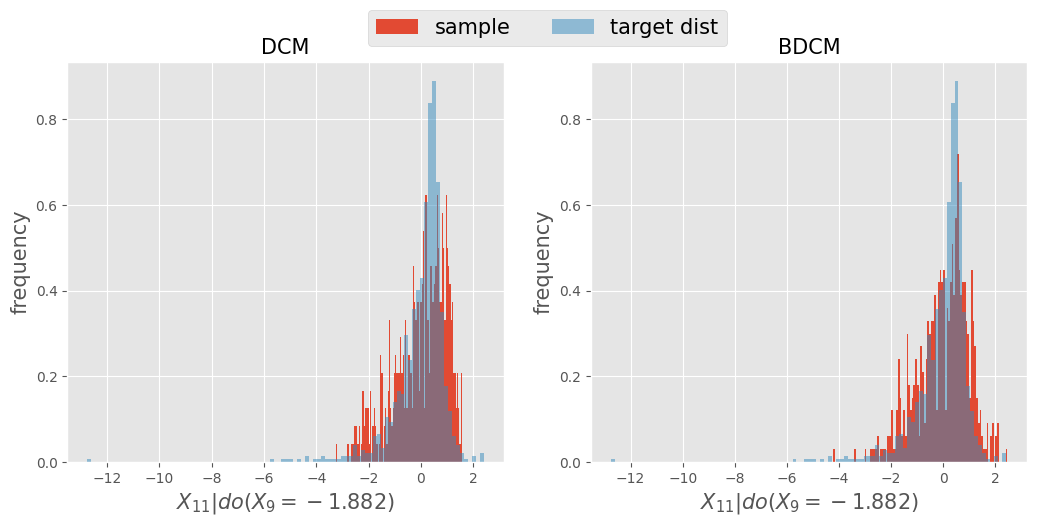

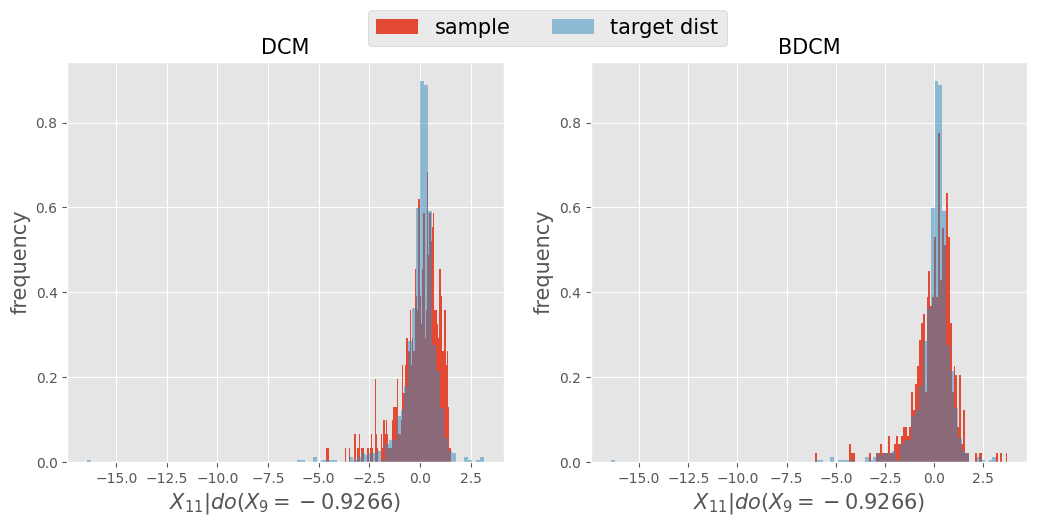

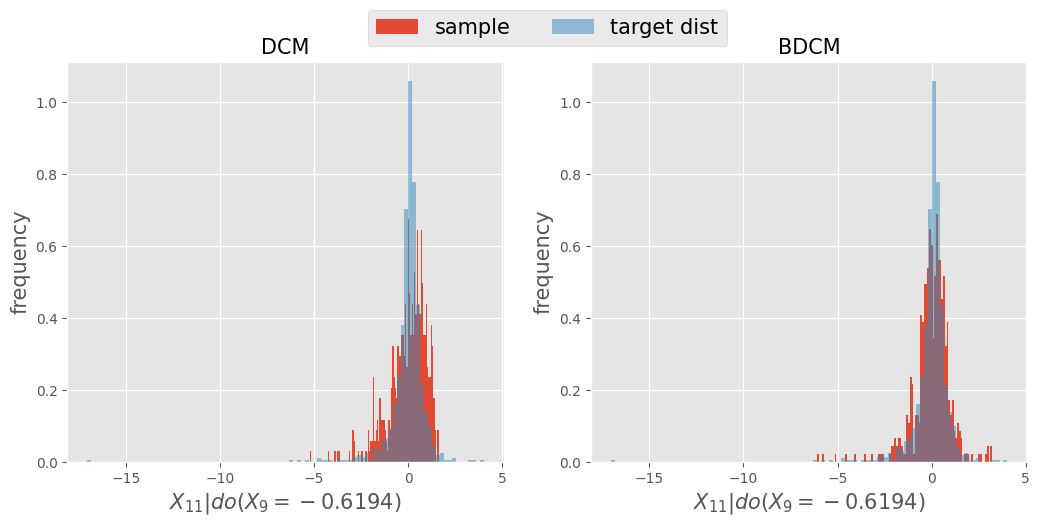

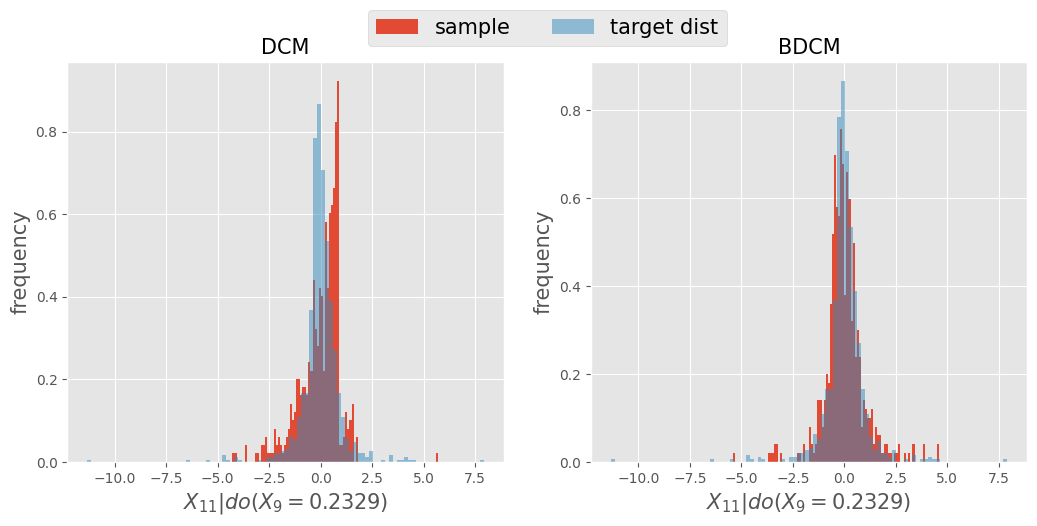

 40%|████      | 2/5 [17:00<25:30, 510.25s/it]

mean of MMD for DCM: 0.00143
standard deviation of MMD for DCM: 0.000674
mean of MMD for BDCM: 0.000954
standard deviation of MMD for BDCM: 0.000328


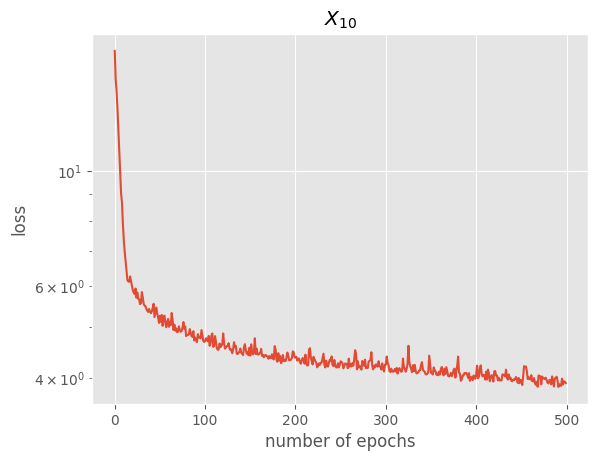

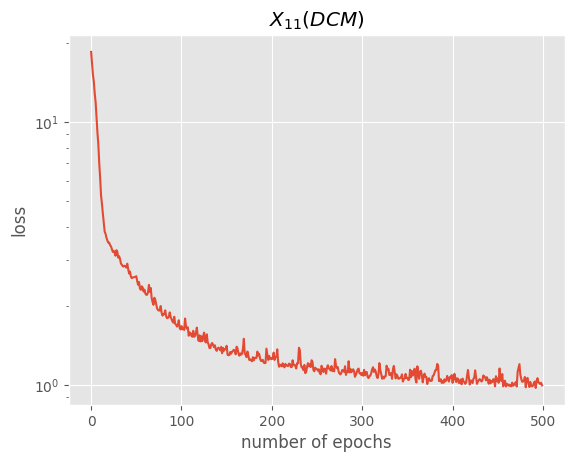

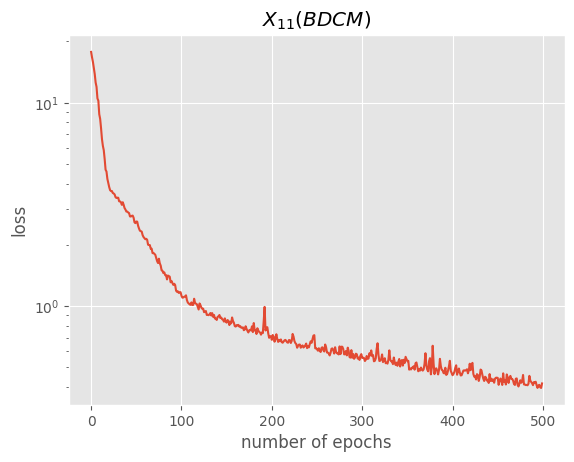

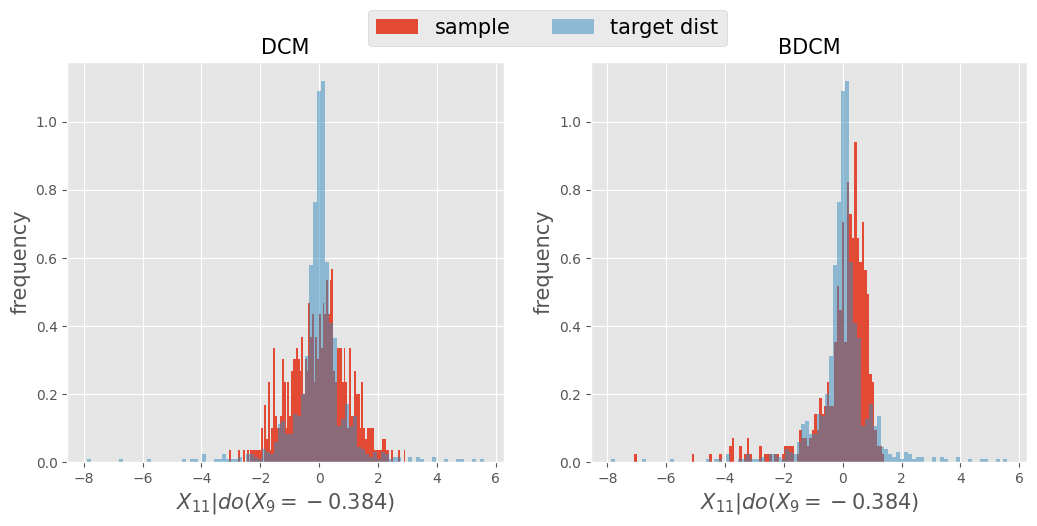

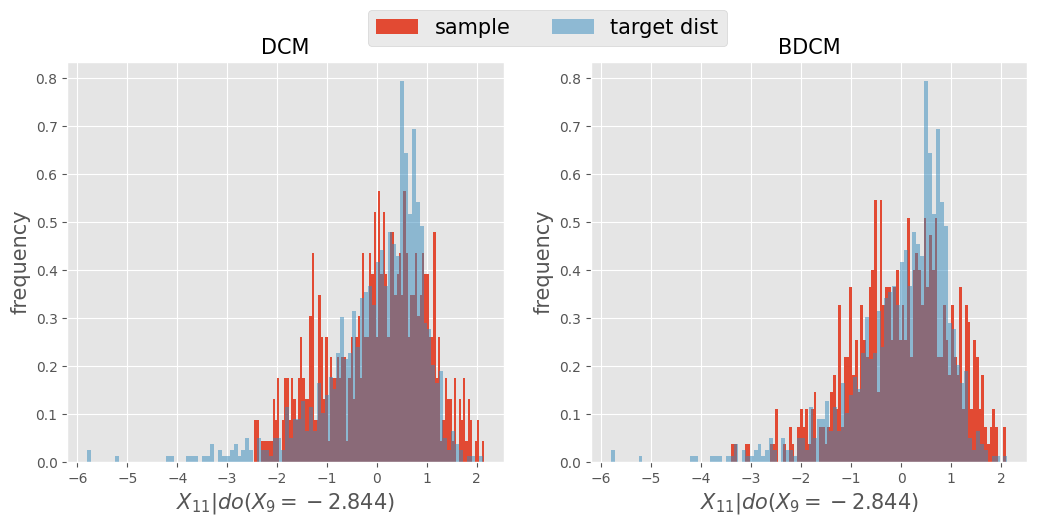

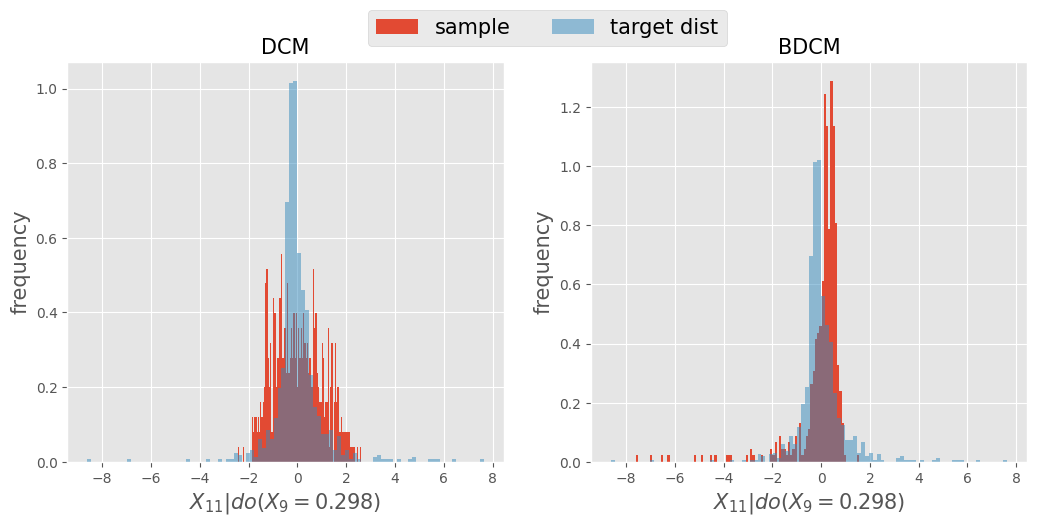

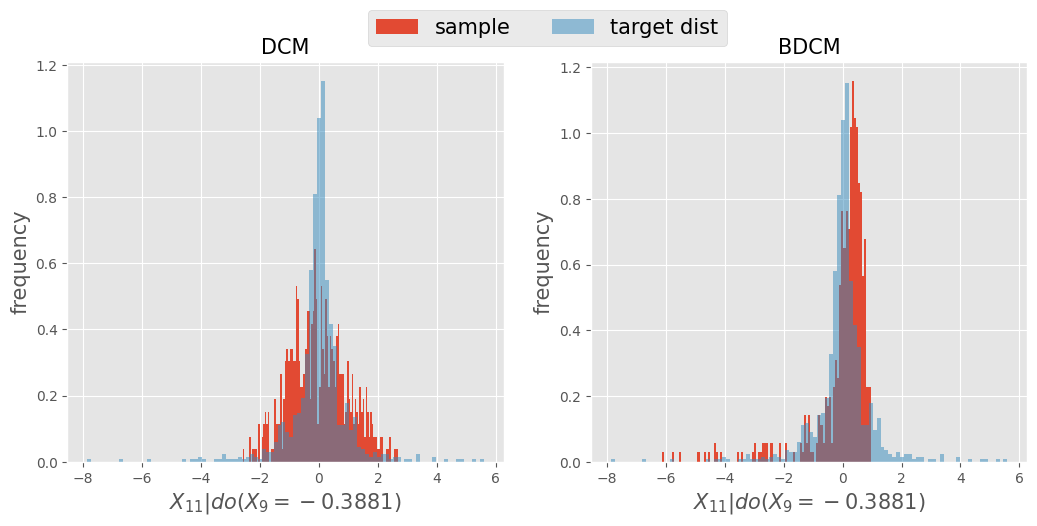

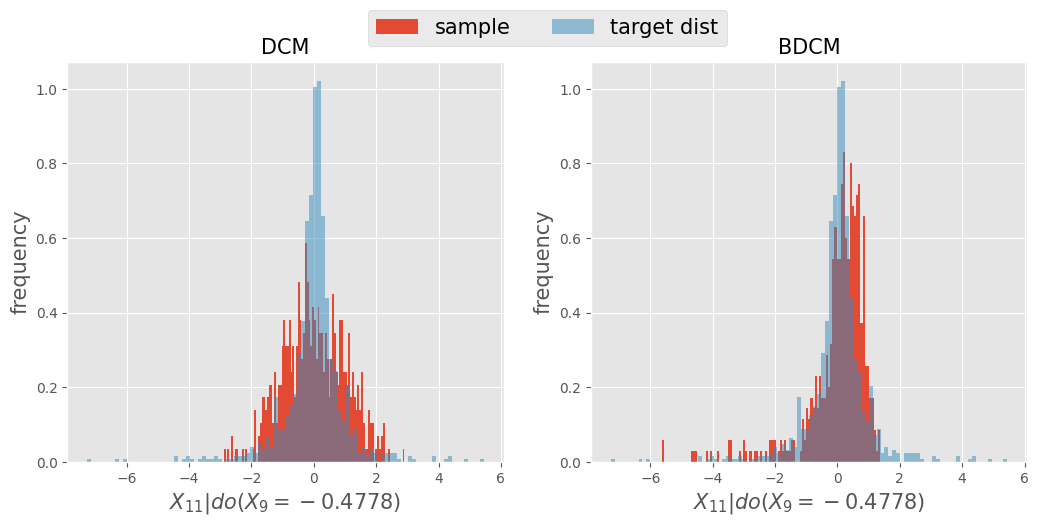

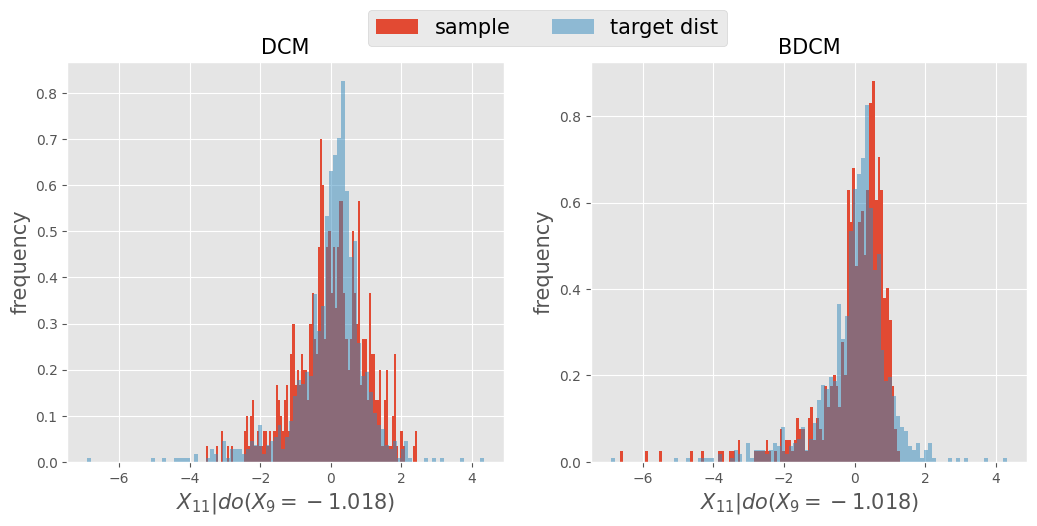

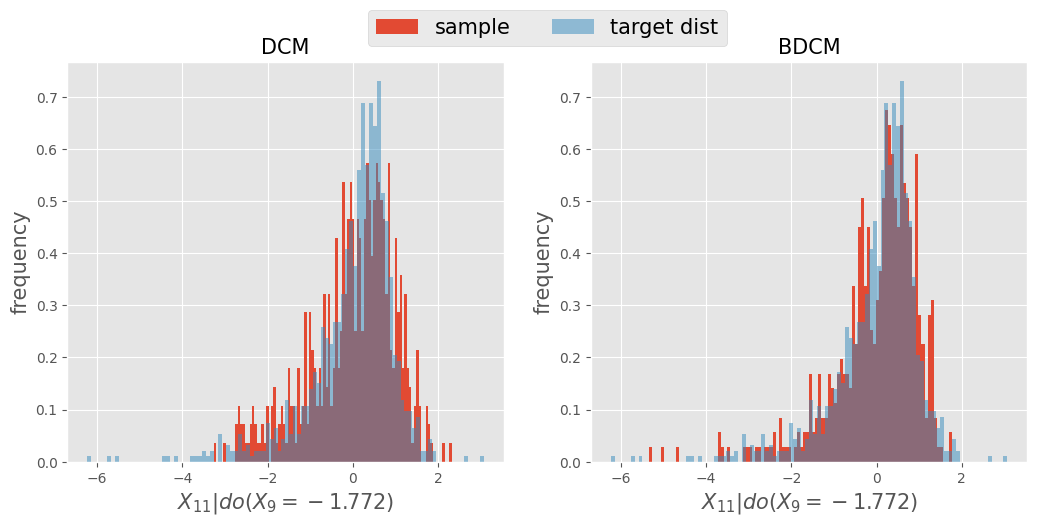

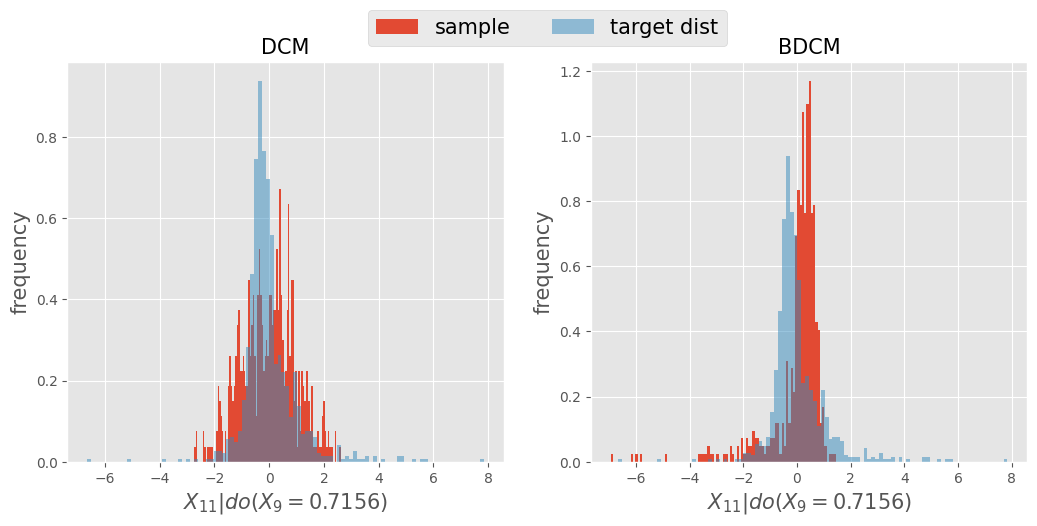

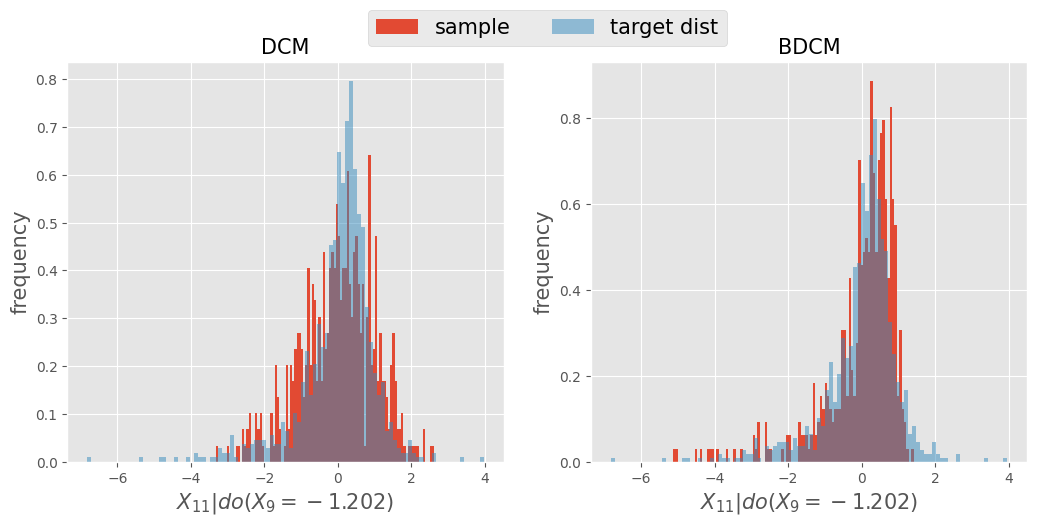

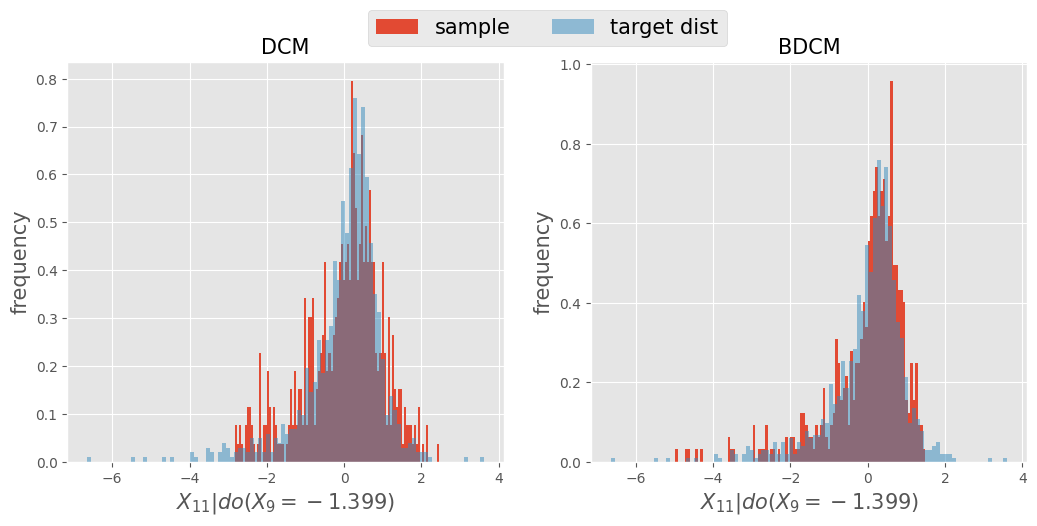

 60%|██████    | 3/5 [25:38<17:08, 514.02s/it]

mean of MMD for DCM: 0.00148
standard deviation of MMD for DCM: 0.000316
mean of MMD for BDCM: 0.00152
standard deviation of MMD for BDCM: 0.00159


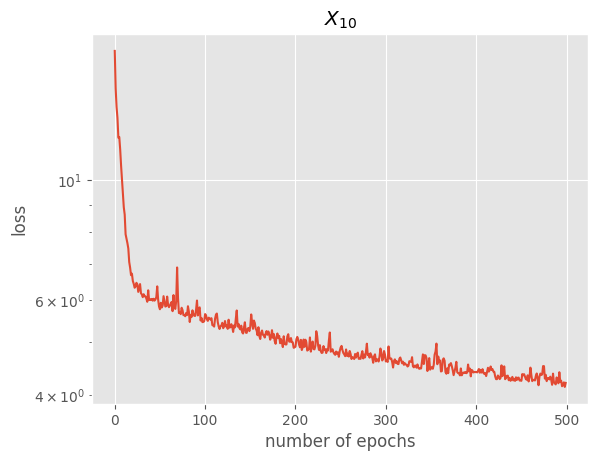

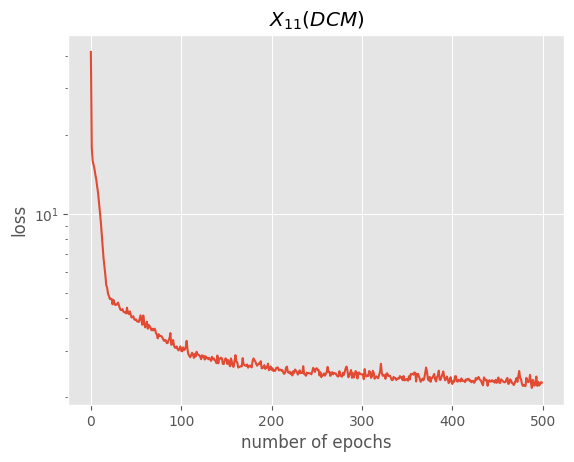

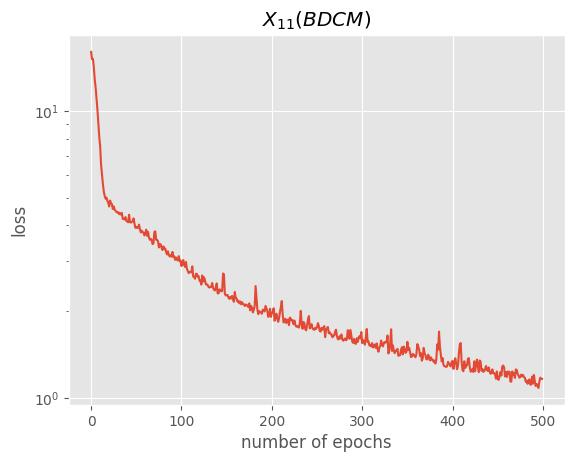

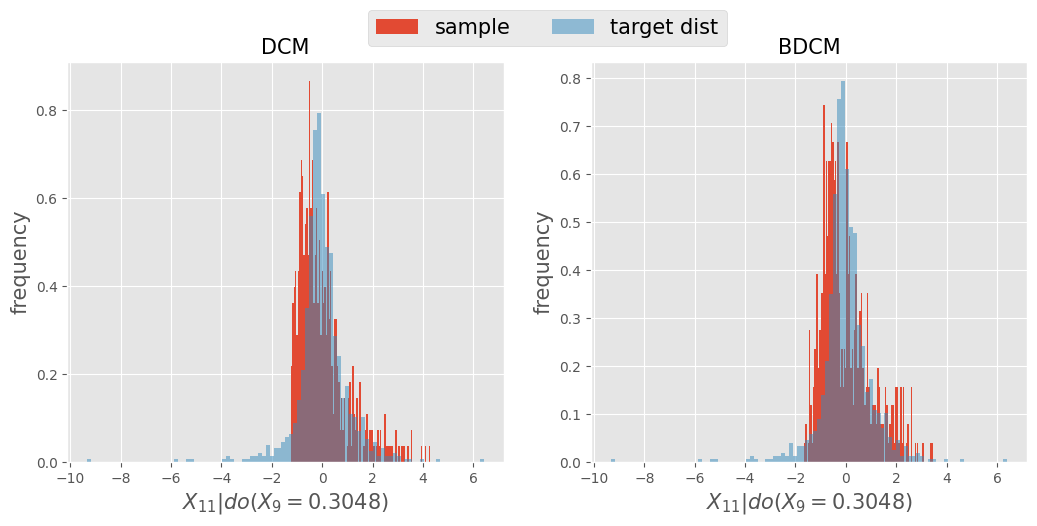

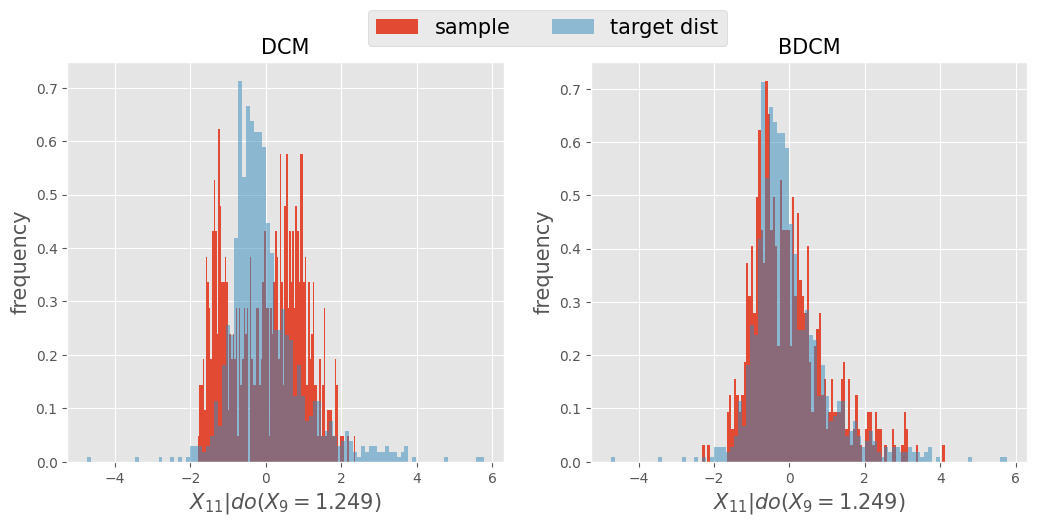

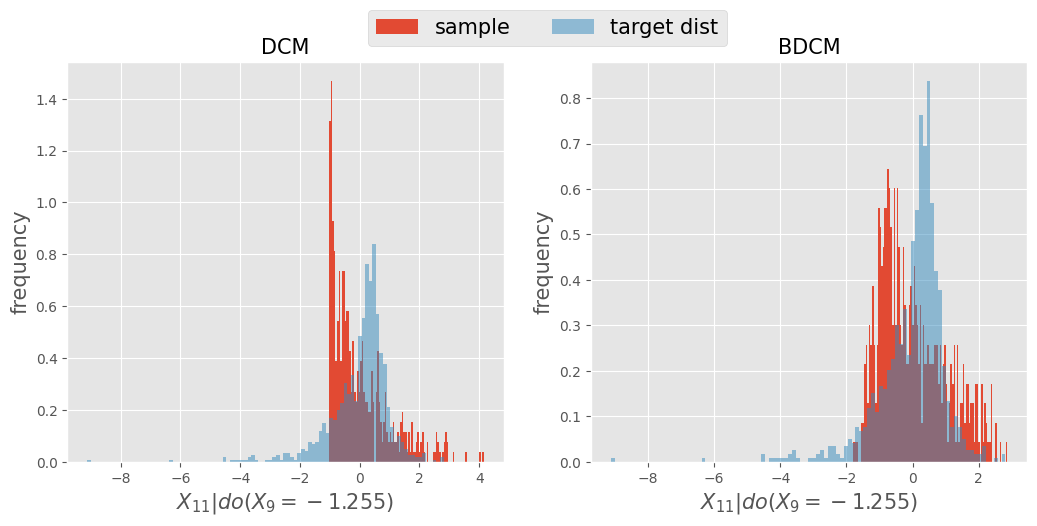

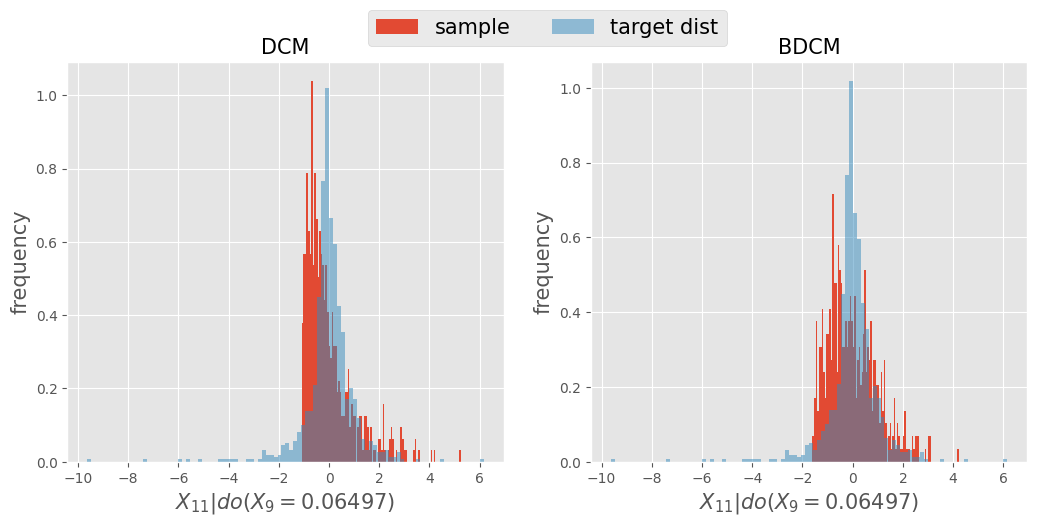

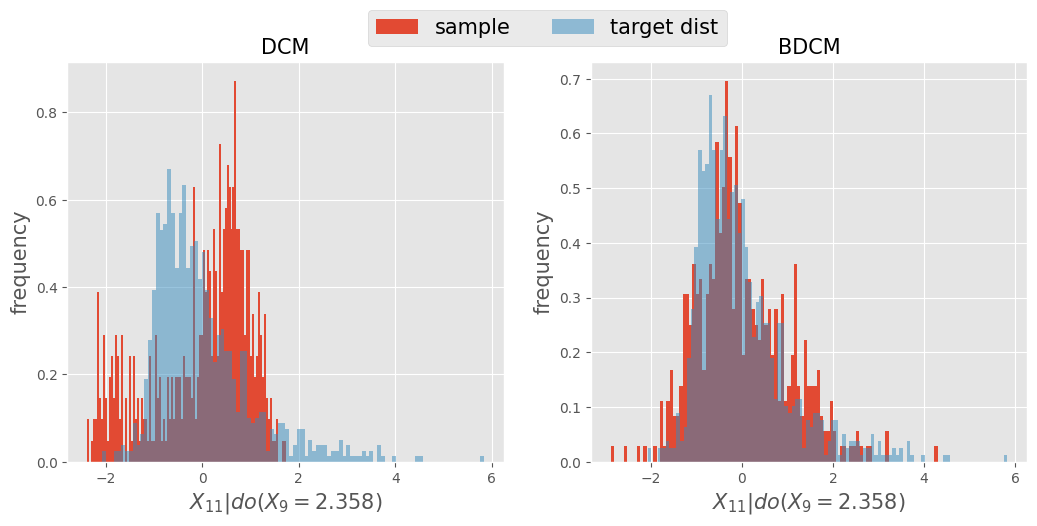

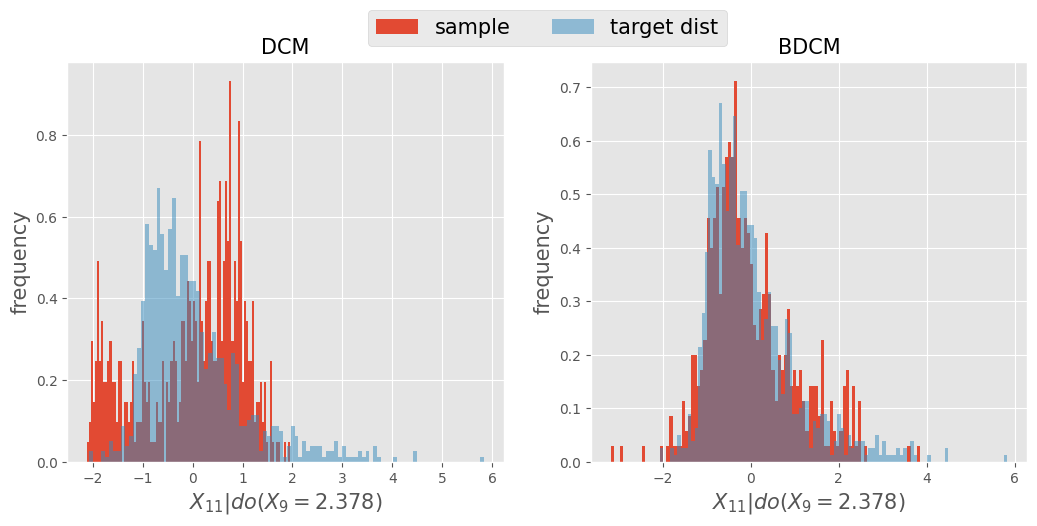

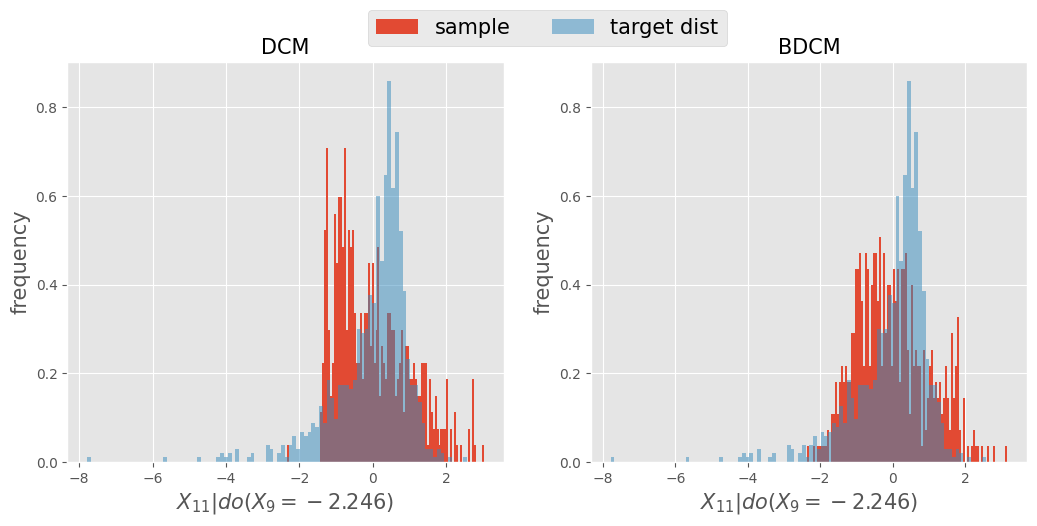

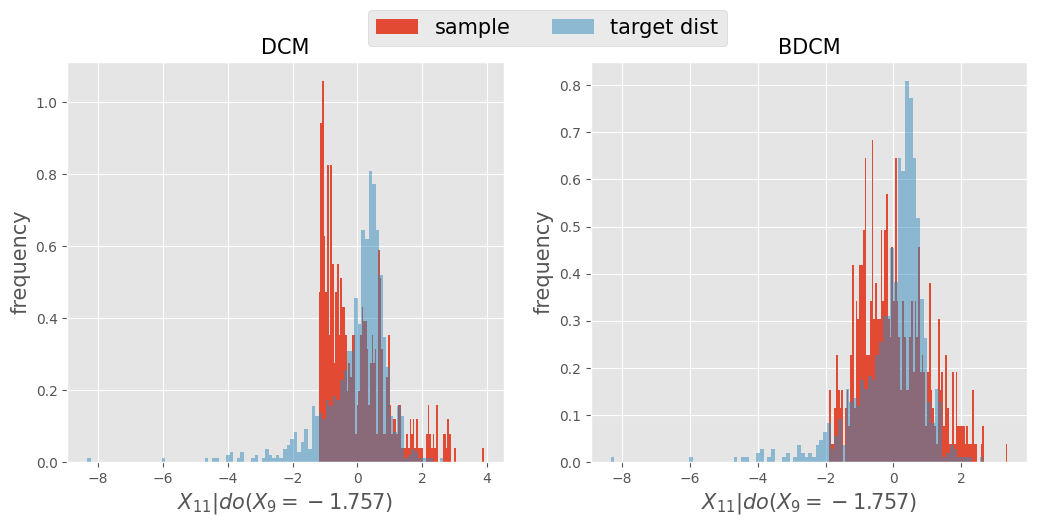

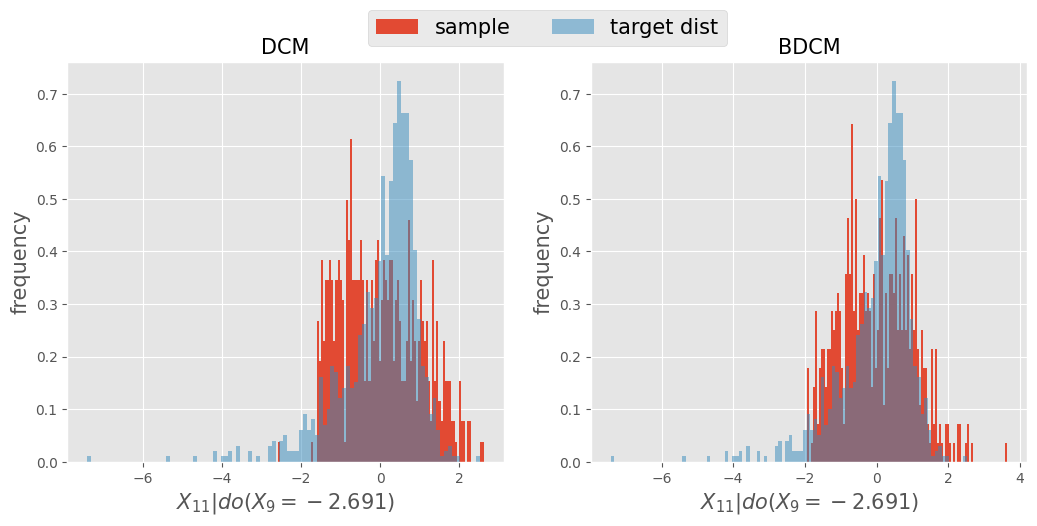

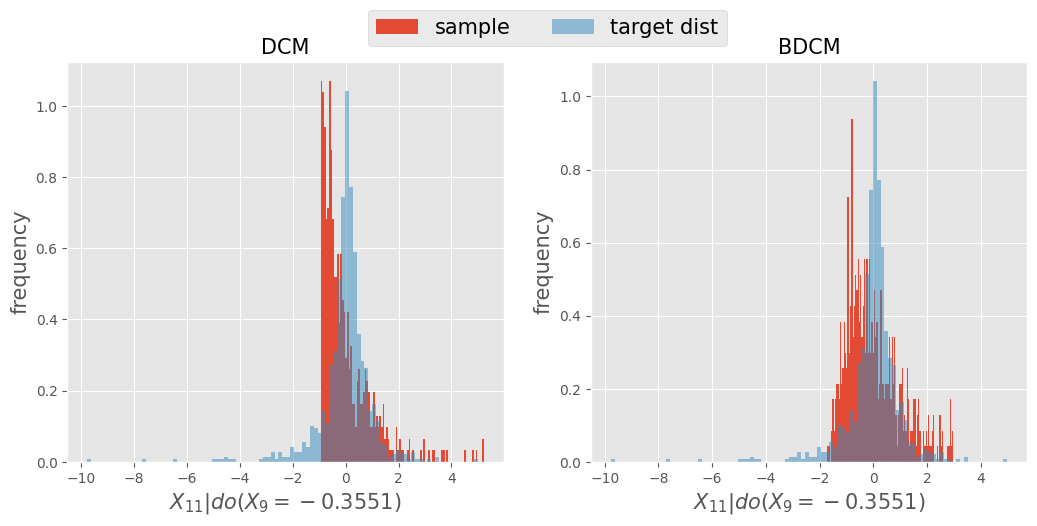

 80%|████████  | 4/5 [34:05<08:31, 511.28s/it]

mean of MMD for DCM: 0.00167
standard deviation of MMD for DCM: 0.000472
mean of MMD for BDCM: 0.000994
standard deviation of MMD for BDCM: 0.000575


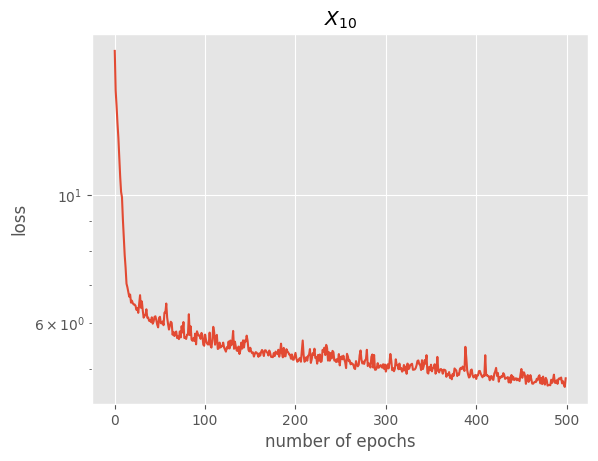

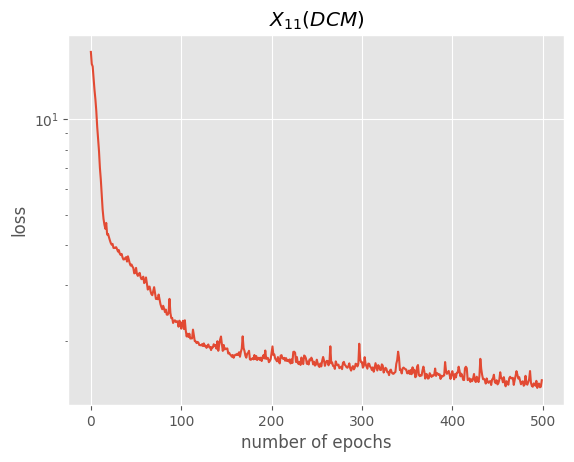

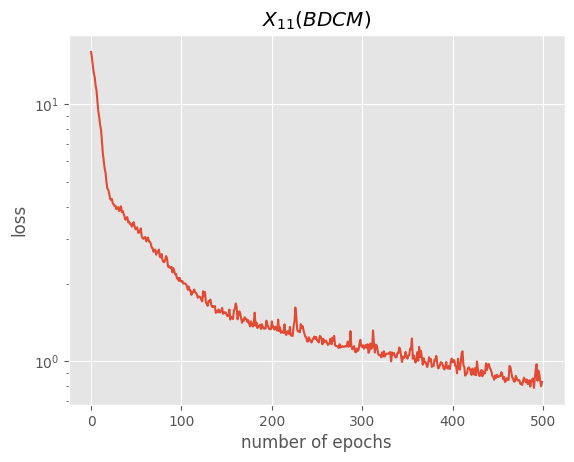

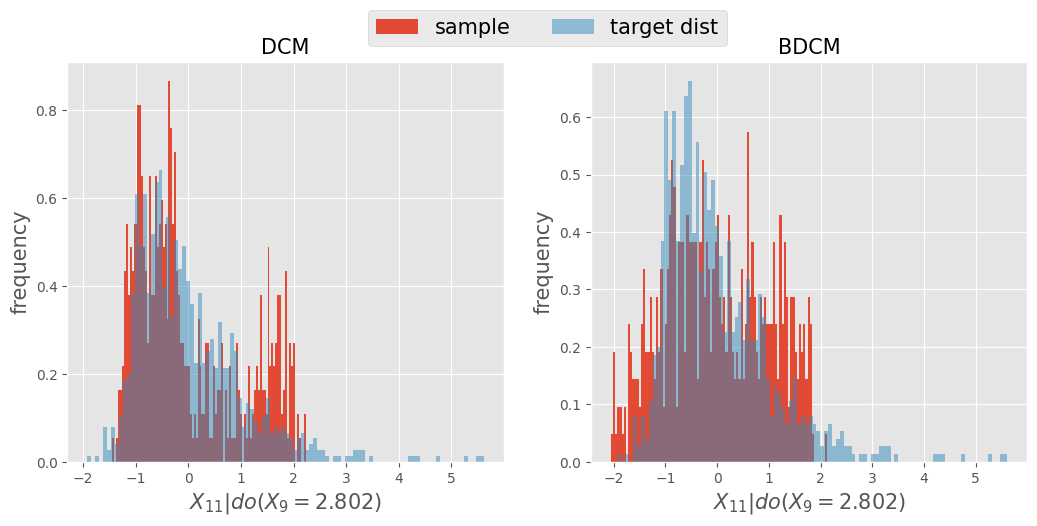

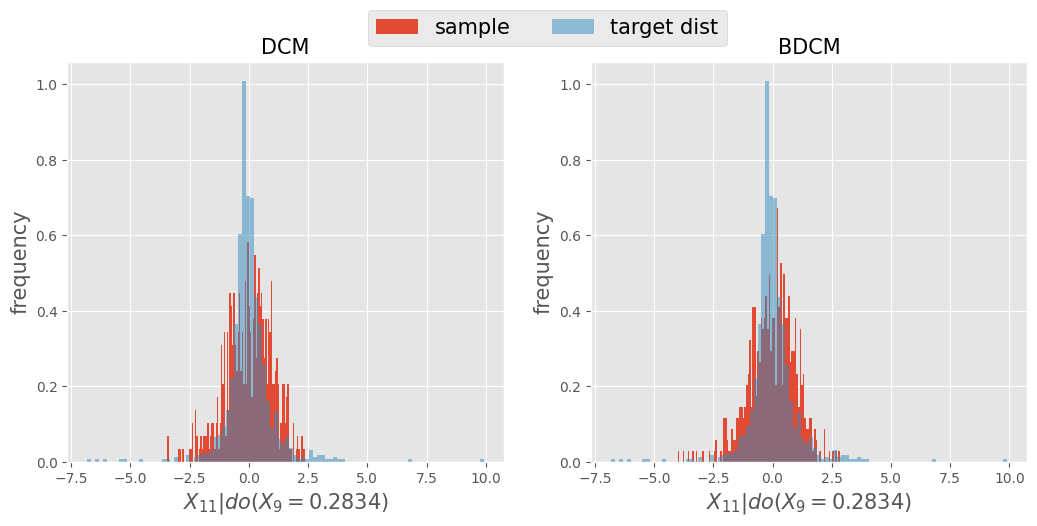

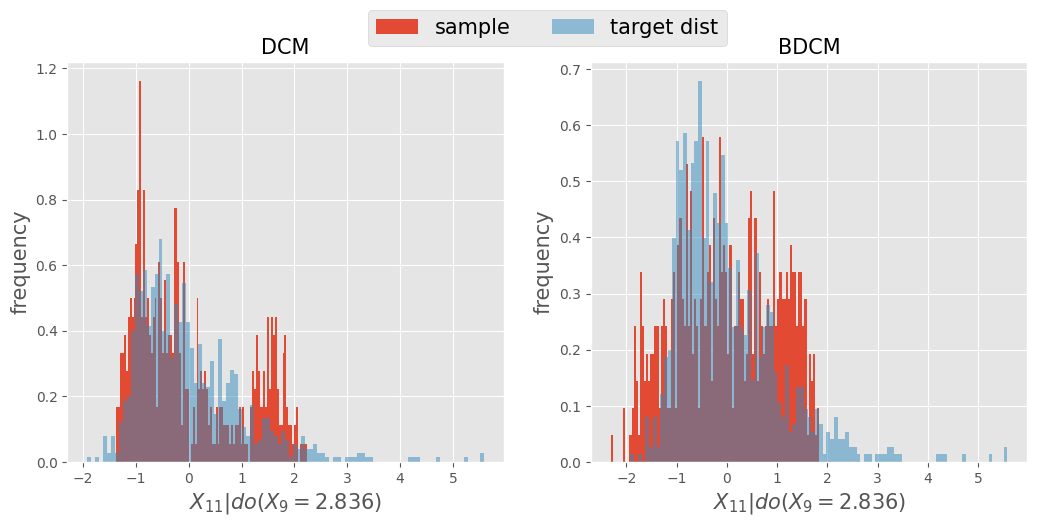

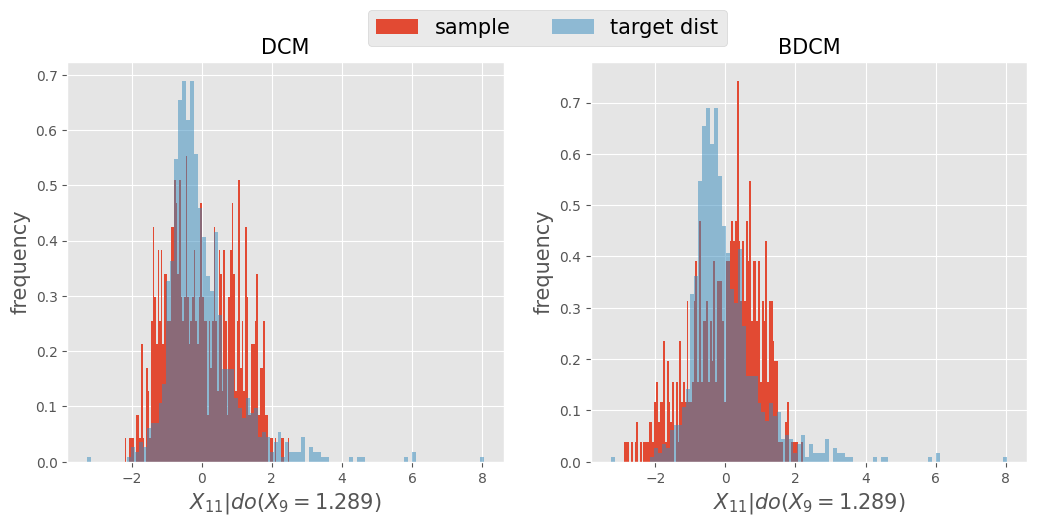

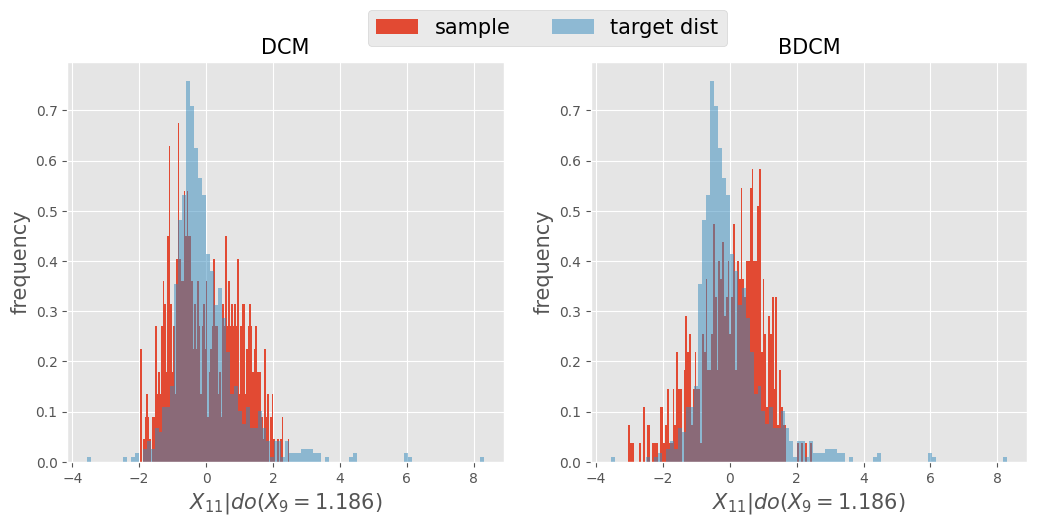

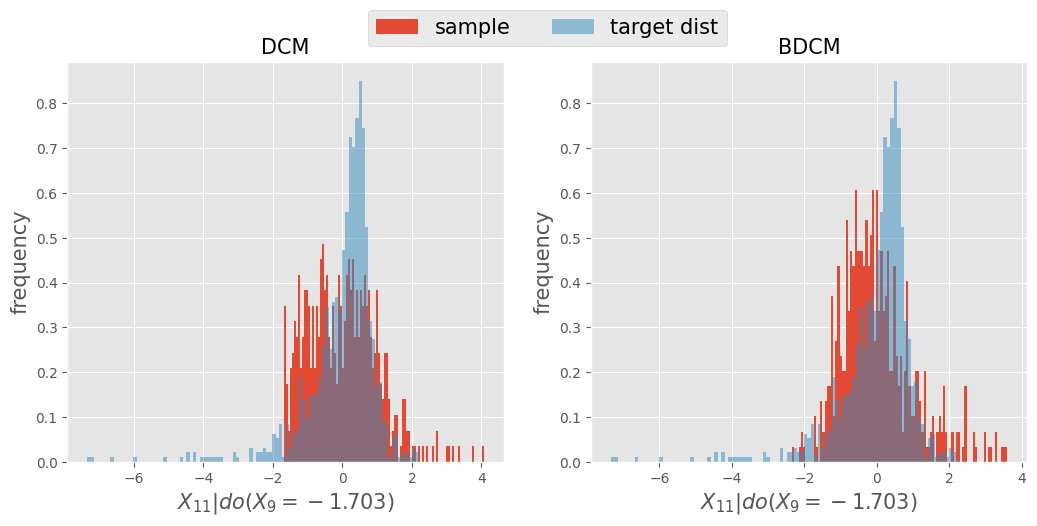

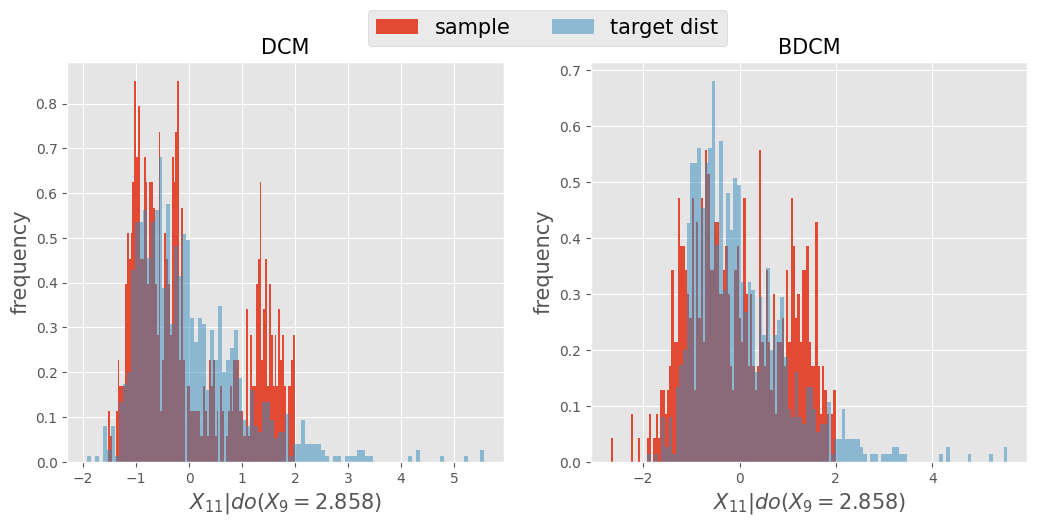

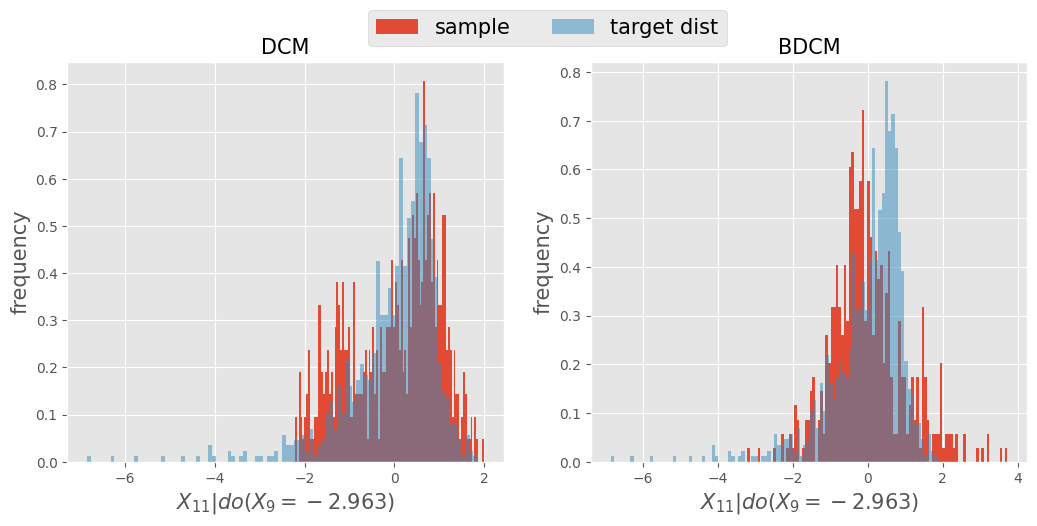

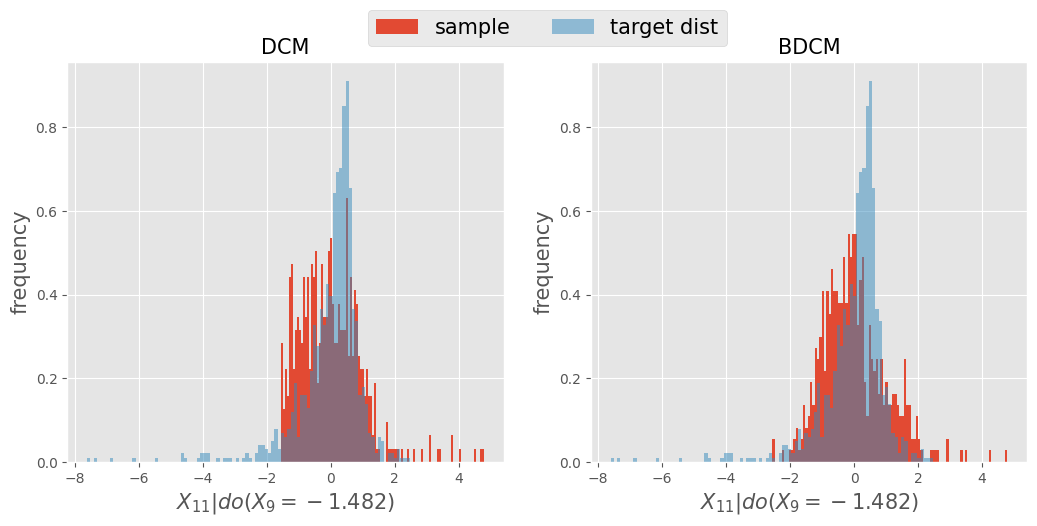

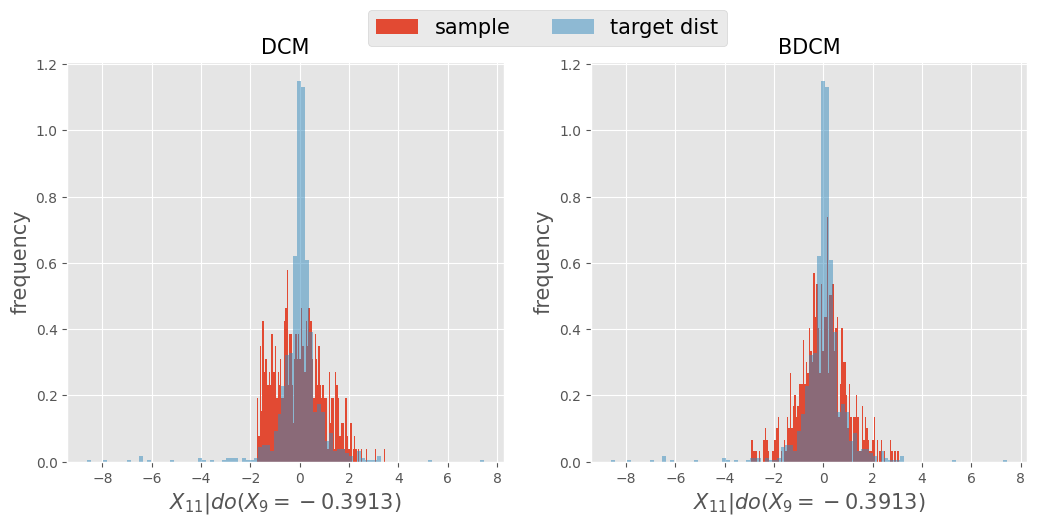

100%|██████████| 5/5 [42:32<00:00, 510.47s/it]

mean of MMD for DCM: 0.00139
standard deviation of MMD for DCM: 0.000757
mean of MMD for BDCM: 0.00184
standard deviation of MMD for BDCM: 0.000815
mean of all MMD for DCM: 0.00141
standard deviation of all MMD for DCM: 0.000591
mean of all MMD for BDCM: 0.00129
standard deviation of all MMD for BDCM: 0.000938


In [5]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = x[0] * (u + 0.1)
  elif ind == 2:
    output = -(np.sqrt(abs(x[1]) * (abs(u) + 0.1))) / 2 + abs(x[1]) + u / 5
  elif ind == 3:
    output = x[1] + (u + 0.1) / 2 * x[1]
  elif ind == 4:
    output = -1 / (1 + (abs(u) + 0.1) * np.exp(-x[0]))
  elif ind == 5:
    output = (u * (abs(x[4]) + 0.3)) / 5 + u
  elif ind == 6:
    output =x[5] * u + abs(x[5] + 0.01) * abs(u)
  elif ind == 7:
    output = 3 * x[5] + 0.1 + u
  elif ind == 8:
    output = x[0] ** 3 * x[4] + x[0] - x[4] + u
  elif ind == 9:
    output = x[8] * u + (u + 0.1) ** 2
  elif ind == 10:
    output = x[2]  * (x[7] - 0.1) + x[8] * x[9] + x[2] * x[8] - x[6] * x[9] + x[2] * x[7] - x[3] * x[8] + x[8] * x[9]
  return normalize(output)

SCM5(structural_eq=structural_eq, simple_or_complex = "complex")